**This notebook provide the best practices to consume covid-lake API.**

In [4]:
# General Import

import pandas as pd
import numpy as np
import re
import seaborn as sns

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline

#!pip install scipy
from scipy.stats import pearsonr

In [6]:
# Plotting functions
# %run /home/ubuntu/notebooks/covid-prj01-data-analysis/API_SERVER/EDAs/python_plotting_functions.ipynb

In [8]:
%run /home/ubuntu/notebooks/covid-prj01-data-analysis/[UTILS]/dremio-access-new.py

dremio = DremioQueryMakerJDBC()
index = dremio.getIndex()
display(index)

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,VIEW_DEFINITION
0,DREMIO,Covid-Lake,Disease_Indicator,"SELECT createdOn, identifier, valueString, val..."
1,DREMIO,Covid-Lake,hospitalizações,"SELECT * FROM ""hospitalizacoes.csv"""
2,DREMIO,Covid-Lake,Institution,SELECT * FROM logical_entity
3,DREMIO,Covid-Lake,News&Trends,SELECT * FROM logical_entity
4,DREMIO,Covid-Lake,Socioeconomic_Factors,"SELECT createdOn, clean_data_to_FLOAT(valueStr..."
5,DREMIO,covidlake-raw,brasil_io,"SELECT *\nFROM ""brasil.io"""
6,DREMIO,covidlake-raw,cities,"SELECT * FROM ""Base Coordenadas Brasil.parquet"""
7,DREMIO,covidlake-raw,fiocruz_infogripe,SELECT * FROM fiocruz_infogripe
8,DREMIO,covidlake-raw,google_trends,"SELECT * FROM ""google_trends.parquet"""
9,DREMIO,covidlake-raw,health_ministry,SELECT * FROM health_ministry


In [4]:
wcota = dremio.getTable(19)
wcota.head()

,index,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,epi_week,cod_RegiaoDeSaude,name_RegiaoDeSaude,_source,location_id
0,0,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
1,2,2020-02-26,Brazil,SP,São Paulo/SP,3550308,0,0,0,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
2,4,2020-02-27,Brazil,SP,São Paulo/SP,3550308,0,0,0,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
3,6,2020-02-28,Brazil,SP,São Paulo/SP,3550308,0,0,1,2,0.0,0.01632,0.0,NaN,NaN,None,None,4610
4,8,2020-02-29,Brazil,SP,São Paulo/SP,3550308,0,0,0,2,0.0,0.01632,0.0,NaN,NaN,None,None,4610


In [5]:
wcota.shape

(301795, 18)

## exploreEntity

Presents an overview of the tables existing in the covid-lake.

URL: http://23.20.157.201/api/exploreEntity

*Each Table represents a CDM (Common Data Model) because it encompesses a set of dataset collected from different sources and mapped following a standard enitity.*

### Let's play with Data :)

- **Analyzing wcota dataset**

Checking all columns

In [6]:
all_columns = wcota.columns.values.tolist()
len(all_columns)
#all_columns

18

In [7]:
all_columns

['index',
 'date',
 'country',
 'state',
 'city',
 'ibgeID',
 'newDeaths',
 'deaths',
 'newCases',
 'totalCases',
 'deaths_per_100k_inhabitants',
 'totalCases_per_100k_inhabitants',
 'deaths_by_totalCases',
 'epi_week',
 'cod_RegiaoDeSaude',
 'name_RegiaoDeSaude',
 '_source',
 'location_id']

Verifying all NAs

In [8]:
# count NAs per column
#wcota.isnull().sum()
wcota.isna().sum()

index                                   0
date                                    0
country                                 0
state                                   0
city                                    0
ibgeID                                  0
newDeaths                               0
deaths                                  0
newCases                                0
totalCases                              0
deaths_per_100k_inhabitants             0
totalCases_per_100k_inhabitants         0
deaths_by_totalCases                    0
epi_week                           250497
cod_RegiaoDeSaude                  250739
name_RegiaoDeSaude                 250739
_source                             78706
location_id                             0
dtype: int64

Dropping all NAs

In [9]:
# shows all NAs
#base_unif.isna()

# remove columns full of NAs
wcota = wcota.dropna(axis=1,how='all')
wcota.head()

,index,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,epi_week,cod_RegiaoDeSaude,name_RegiaoDeSaude,_source,location_id
0,0,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
1,2,2020-02-26,Brazil,SP,São Paulo/SP,3550308,0,0,0,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
2,4,2020-02-27,Brazil,SP,São Paulo/SP,3550308,0,0,0,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
3,6,2020-02-28,Brazil,SP,São Paulo/SP,3550308,0,0,1,2,0.0,0.01632,0.0,NaN,NaN,None,None,4610
4,8,2020-02-29,Brazil,SP,São Paulo/SP,3550308,0,0,0,2,0.0,0.01632,0.0,NaN,NaN,None,None,4610


In [71]:
# removing state from city column
wcota.city = wcota.city.str.replace("\/[A-Z]+$","")
wcota.head()

,index,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,epi_week,cod_RegiaoDeSaude,name_RegiaoDeSaude,_source,location_id
0,0,2020-02-25,Brazil,SP,São Paulo,3550308,0,0,1,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
1,2,2020-02-26,Brazil,SP,São Paulo,3550308,0,0,0,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
2,4,2020-02-27,Brazil,SP,São Paulo,3550308,0,0,0,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
3,6,2020-02-28,Brazil,SP,São Paulo,3550308,0,0,1,2,0.0,0.01632,0.0,NaN,NaN,None,None,4610
4,8,2020-02-29,Brazil,SP,São Paulo,3550308,0,0,0,2,0.0,0.01632,0.0,NaN,NaN,None,None,4610


In [72]:
wcota.shape

(301795, 18)

Verifying the duplicated columns

In [73]:
# drop duplicates
#base_unif2 = drop_duplicates(base_unif)
wcota = wcota.drop_duplicates() 
wcota.head()
# no duplicates

,index,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,epi_week,cod_RegiaoDeSaude,name_RegiaoDeSaude,_source,location_id
0,0,2020-02-25,Brazil,SP,São Paulo,3550308,0,0,1,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
1,2,2020-02-26,Brazil,SP,São Paulo,3550308,0,0,0,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
2,4,2020-02-27,Brazil,SP,São Paulo,3550308,0,0,0,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
3,6,2020-02-28,Brazil,SP,São Paulo,3550308,0,0,1,2,0.0,0.01632,0.0,NaN,NaN,None,None,4610
4,8,2020-02-29,Brazil,SP,São Paulo,3550308,0,0,0,2,0.0,0.01632,0.0,NaN,NaN,None,None,4610


In [74]:
wcota.shape

(301795, 18)

Shows all the data, though it runs quite slow for big datasets

In [75]:
#force_show_all_columns(base_unif)

Describe the dataset

In [76]:
wcota.describe()

,index,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,epi_week,cod_RegiaoDeSaude,location_id
count,301795.000000,3.017950e+05,301795.000000,301795.000000,301795.000000,301795.000000,301795.000000,301795.000000,301795.000000,51298.000000,51056.000000,301795.000000
mean,151480.593797,3.143164e+06,0.202604,7.039772,4.832399,139.053102,5.893656,192.447656,0.054427,26.607139,32042.497258,2551.149853
std,87766.632454,1.010304e+06,3.752317,105.817226,87.673384,1474.902002,12.670203,420.124112,0.149265,0.488391,9874.424557,1513.109517
min,0.000000,1.100000e+01,-216.000000,0.000000,-5981.000000,0.000000,0.000000,0.000000,0.000000,26.000000,11001.000000,1.000000
25%,75605.500000,2.410405e+06,0.000000,0.000000,0.000000,2.000000,0.000000,15.346840,0.000000,26.000000,25005.000000,1246.000000
50%,151260.000000,3.133709e+06,0.000000,0.000000,0.000000,8.000000,0.000000,53.022270,0.000000,27.000000,31048.000000,2562.000000
75%,226569.500000,4.104907e+06,0.000000,1.000000,0.000000,40.000000,6.170930,184.749300,0.043480,27.000000,41011.250000,3895.000000
max,308085.000000,5.300108e+06,434.000000,7370.000000,19030.000000,134984.000000,187.188020,14148.174240,2.000000,27.000000,53001.000000,5252.000000


Describe the fields

In [77]:
list(wcota['country'].unique())

['Brazil']

In [78]:
wcota['state'].unique()
#list(wcota['state'].unique())

array(['SP', 'RJ', 'ES', 'BA', 'DF', 'MG', 'AL', 'RS', 'PR', 'SC', 'GO',
       'RN', 'PE', 'AM', 'SE', 'MS', 'CE', 'AC', 'PA', 'PB', 'TO', 'PI',
       'MT', 'RO', 'AP', 'MA', 'RR'], dtype=object)

In [79]:
wcota['state'].describe()

count     301795
unique        27
top           SP
freq       40120
Name: state, dtype: object

In [80]:
wcota['city'].unique()
#list(wcota['state'].unique())

array(['São Paulo', 'Barra Mansa', 'CASO SEM LOCALIZAÇÃO DEFINIDA', ...,
       'São Pedro do Ivaí', 'Tamboril do Piauí', 'Tumiritinga'],
      dtype=object)

In [81]:
wcota['city'].describe()

count                            301795
unique                             4975
top       CASO SEM LOCALIZAÇÃO DEFINIDA
freq                               1941
Name: city, dtype: object

Frequency of each city

In [82]:
# array with each count    
counts = np.unique(wcota['city'], return_counts=True)

# dataframe
state_count = pd.DataFrame({'city': counts[0], 'freq': counts[1]})
state_count.sort_values(by=['freq'], inplace=True,ascending=False)
state_count.head()

,city,freq
695,CASO SEM LOCALIZAÇÃO DEFINIDA,1941
3927,Santa Luzia,306
575,Bom Jesus,292
1277,Cruzeiro do Sul,261
571,Bom Jardim,244


Frequency of each state

In [83]:
# array with each count    
counts = np.unique(wcota['state'], return_counts=True)

# dataframe
state_count = pd.DataFrame({'state': counts[0], 'freq': counts[1]})
state_count.sort_values(by=['freq'], inplace=True,ascending=False)
state_count.head()

,state,freq
25,SP,40120
10,MG,33267
22,RS,22278
4,BA,21831
17,PR,18927


Descriptive analysis

In [22]:
wcota['newCases'].describe()

count    301795.000000
mean          4.832399
std          87.673384
min       -5981.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       19030.000000
Name: newCases, dtype: float64

In [23]:
wcota['totalCases'].describe()

count    301795.000000
mean        139.053102
std        1474.902002
min           0.000000
25%           2.000000
50%           8.000000
75%          40.000000
max      134984.000000
Name: totalCases, dtype: float64

In [24]:
wcota['deaths_per_100k_inhabitants'].describe()

count    301795.000000
mean          5.893656
std          12.670203
min           0.000000
25%           0.000000
50%           0.000000
75%           6.170930
max         187.188020
Name: deaths_per_100k_inhabitants, dtype: float64

In [25]:
wcota['totalCases_per_100k_inhabitants'].describe()

count    301795.000000
mean        192.447656
std         420.124112
min           0.000000
25%          15.346840
50%          53.022270
75%         184.749300
max       14148.174240
Name: totalCases_per_100k_inhabitants, dtype: float64

In [26]:
wcota['deaths_by_totalCases'].describe()

count    301795.000000
mean          0.054427
std           0.149265
min           0.000000
25%           0.000000
50%           0.000000
75%           0.043480
max           2.000000
Name: deaths_by_totalCases, dtype: float64

## Graphs

#### Showing the null values

In [27]:
df = wcota

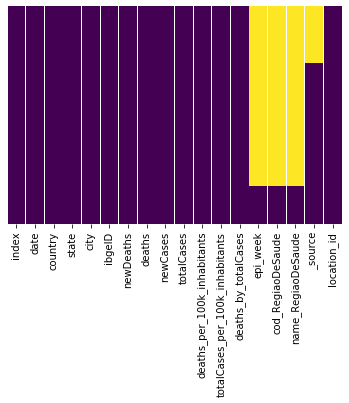

In [28]:
# Missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [29]:
# For more details
display(df.isnull().sum().sort_values(ascending=False))

name_RegiaoDeSaude                 250739
cod_RegiaoDeSaude                  250739
epi_week                           250497
_source                             78706
location_id                             0
newDeaths                               0
date                                    0
country                                 0
state                                   0
city                                    0
ibgeID                                  0
newCases                                0
deaths                                  0
totalCases                              0
deaths_per_100k_inhabitants             0
totalCases_per_100k_inhabitants         0
deaths_by_totalCases                    0
index                                   0
dtype: int64

#### Looking for correlations

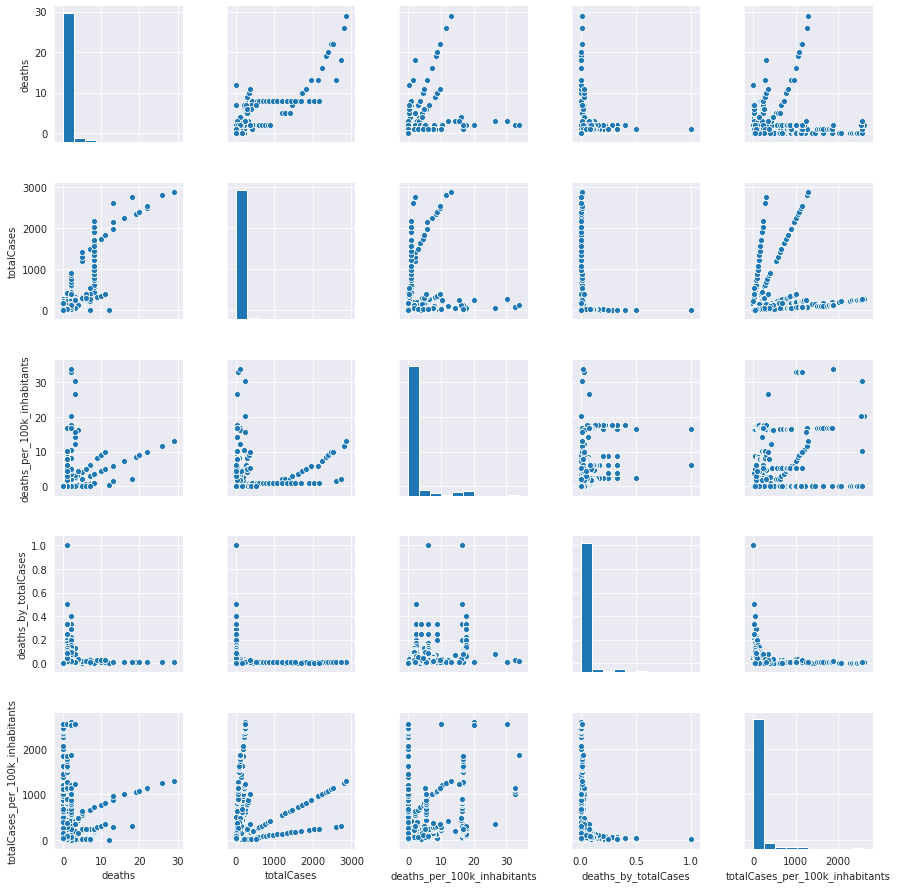

In [84]:
columns = [
    'deaths',
    'totalCases',
    'deaths_per_100k_inhabitants',
    'deaths_by_totalCases',
    "totalCases_per_100k_inhabitants"
]
sns.set_style("darkgrid")
sns.pairplot(df[columns])

### Apparently, the number of deaths and of total cases are positively correlated. Let's verify that:

In [31]:
#from scipy.stats import personsr
pearson_cor = pearsonr(df.deaths, df.totalCases)
print('Pearsons correlation: %.3f' % pearson_cor[0])

Pearsons correlation: 0.925


In [32]:
#from scipy.stats import personsr
pearson_cor = pearsonr(df.deaths_per_100k_inhabitants, df.totalCases)
print('Pearsons correlation: %.3f' % pearson_cor[0])

Pearsons correlation: 0.223


#### This hypothesis was confirmed, with a very high correlation, though the correlation between deaths per 100k inhabitants and total cases is quite low. This suggests that further investigations are necessary.

### Unifying the date column to produce more graphs

In [33]:
# Unify the date column format
df['date'] = pd.to_datetime(df.date).dt.date
# Sort dates
df = df.sort_values('date')
df = df.dropna(subset=['city'])
cumulated = df.groupby('date').agg({'deaths_per_100k_inhabitants': 'sum',
                                    'deaths_by_totalCases': 'sum',
                                    'totalCases_per_100k_inhabitants': 'sum',
                                   }).reset_index()


/home/ubuntu/anaconda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


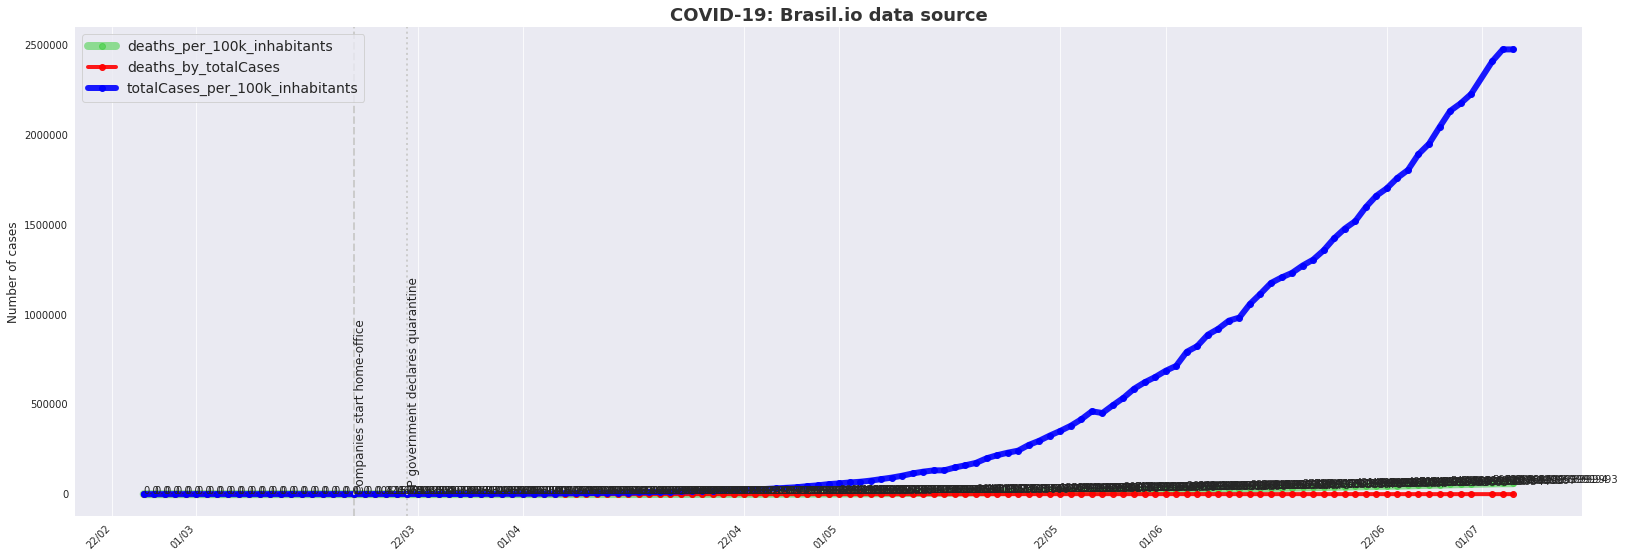

In [34]:
#import matplotlib.pyplot as plt 
#import matplotlib.dates as mdates
#%matplotlib inline

fig, ax = plt.subplots(figsize=(27, 9))

plt.plot(cumulated['date'], cumulated['deaths_per_100k_inhabitants'], color='limegreen', linewidth=8, alpha=0.5, marker='o')
plt.plot(cumulated['date'], cumulated['deaths_by_totalCases'], color='red', linewidth=4, alpha=0.9, marker='o')
plt.plot(cumulated['date'], cumulated['totalCases_per_100k_inhabitants'], color='blue', linewidth=6, alpha=0.9, marker='o')


[ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated['date'], cumulated['deaths_per_100k_inhabitants'])]

plt.xticks(rotation=45, ha='right')
plt.title('COVID-19: Brasil.io data source', fontsize=18, fontweight='bold', color='#333333')

plt.ylabel('Number of cases', fontsize=12)
plt.xlabel(None)

plt.axvline('2020-03-16', 0, 1200, c='#CCCCCC', linestyle='--', linewidth=2, alpha=1)
ax.annotate('Companies start home-office', xy=('2020-03-16',19000), fontsize=12, rotation=90)
plt.axvline('2020-03-21', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
ax.annotate('SP government declares quarantine', xy=('2020-03-21',19000), fontsize=12, rotation=90)

plt.legend(loc=2, labels=['deaths_per_100k_inhabitants','deaths_by_totalCases', 'totalCases_per_100k_inhabitants'], fontsize=14)

plt.grid(which='major', axis='y')
[ax.spines[side].set_visible(False) for side in ['left','right','top']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.show();

#### The great variation in the confirmed deaths per 100k inhabitants and the number of cases seem to be caused by the data retrieved from some states, in which the number of cases decreased, instead of increasing along with the time.

But all states are included in the data, as we can see below, so we can plot only SP data, for instance.

In [36]:
df.state.unique()

array(['SP', 'RJ', 'ES', 'BA', 'DF', 'MG', 'AL', 'RS', 'GO', 'PE', 'RN',
       'SC', 'PR', 'AM', 'SE', 'MS', 'CE', 'AC', 'TO', 'PB', 'PA', 'PI',
       'AP', 'MA', 'RO', 'MT', 'RR'], dtype=object)

# Analyzing state by state

### Plotting only SP state data

In [37]:
df = wcota

In [38]:
df_sp = df.loc[df.state == 'SP']
df_sp.shape

(40120, 18)

In [39]:
df_sp.head()

,index,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,epi_week,cod_RegiaoDeSaude,name_RegiaoDeSaude,_source,location_id
0,0,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
1,2,2020-02-26,Brazil,SP,São Paulo/SP,3550308,0,0,0,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
2,4,2020-02-27,Brazil,SP,São Paulo/SP,3550308,0,0,0,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
3,6,2020-02-28,Brazil,SP,São Paulo/SP,3550308,0,0,1,2,0.0,0.01632,0.0,NaN,NaN,None,None,4610
4,8,2020-02-29,Brazil,SP,São Paulo/SP,3550308,0,0,0,2,0.0,0.01632,0.0,NaN,NaN,None,None,4610


In [40]:
df_sp = df_sp.sort_values('date')
df_sp = df_sp.dropna(subset=['city'])
cumulated_sp = df_sp.groupby('date').agg({'deaths_per_100k_inhabitants': 'sum',
                                    'deaths_by_totalCases': 'sum',
                                    'totalCases_per_100k_inhabitants': 'sum',
                                   }).reset_index()

In [41]:
df_sp.head()

,index,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,epi_week,cod_RegiaoDeSaude,name_RegiaoDeSaude,_source,location_id
0,0,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
1,2,2020-02-26,Brazil,SP,São Paulo/SP,3550308,0,0,0,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
2,4,2020-02-27,Brazil,SP,São Paulo/SP,3550308,0,0,0,1,0.0,0.00816,0.0,NaN,NaN,None,None,4610
3,6,2020-02-28,Brazil,SP,São Paulo/SP,3550308,0,0,1,2,0.0,0.01632,0.0,NaN,NaN,None,None,4610
4,8,2020-02-29,Brazil,SP,São Paulo/SP,3550308,0,0,0,2,0.0,0.01632,0.0,NaN,NaN,None,None,4610


In [42]:
cumulated_sp.head()

,date,deaths_per_100k_inhabitants,deaths_by_totalCases,totalCases_per_100k_inhabitants
0,2020-02-25,0.0,0.0,0.00816
1,2020-02-26,0.0,0.0,0.00816
2,2020-02-27,0.0,0.0,0.00816
3,2020-02-28,0.0,0.0,0.01632
4,2020-02-29,0.0,0.0,0.01632


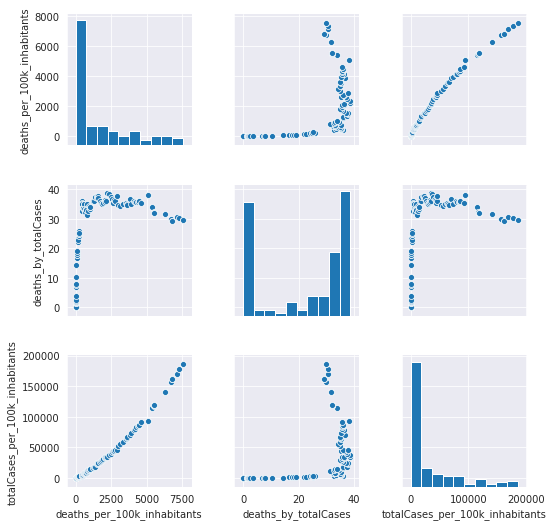

In [87]:
cumulated_sp.deaths_by_totalCases.describe()
columns = ["deaths_per_100k_inhabitants","deaths_by_totalCases","totalCases_per_100k_inhabitants"]
sns.pairplot(cumulated_sp[columns]);

#### There seems to be a positive correlation between total cases per 100k inhabitants and deaths per 100k inhabitants and maybe a non linear relationship between deaths per total cases and deaths per 100k inhabitants. Let's check those possibilities:

In [44]:
pearson_cor = pearsonr(cumulated_sp.totalCases_per_100k_inhabitants, cumulated_sp.deaths_per_100k_inhabitants)
print('Pearsons correlation: %.3f' % pearson_cor[0])

Pearsons correlation: 0.989


### There is indeed a positive correlation between these variables, and it is strong. 

In [45]:
pearson_cor = pearsonr(cumulated_sp.deaths_by_totalCases, cumulated_sp.deaths_per_100k_inhabitants)
print('Pearsons correlation: %.3f' % pearson_cor[0])

Pearsons correlation: 0.590


### This number and the graph suggest that there might be a correlation, but it is not so strong, so it might not be linear. So, further modeling is necessary to explain this behavior.

In [46]:
pearson_cor = pearsonr(cumulated_sp.totalCases_per_100k_inhabitants, cumulated_sp.deaths_by_totalCases)
print('Pearsons correlation: %.3f' % pearson_cor[0])

Pearsons correlation: 0.500


### Looking for further explanations

In [47]:
cumulated_sp.deaths_by_totalCases.describe()

count    130.000000
mean      22.047127
std       15.428185
min        0.000000
25%        1.675347
50%       31.001770
75%       35.226240
max       38.615240
Name: deaths_by_totalCases, dtype: float64

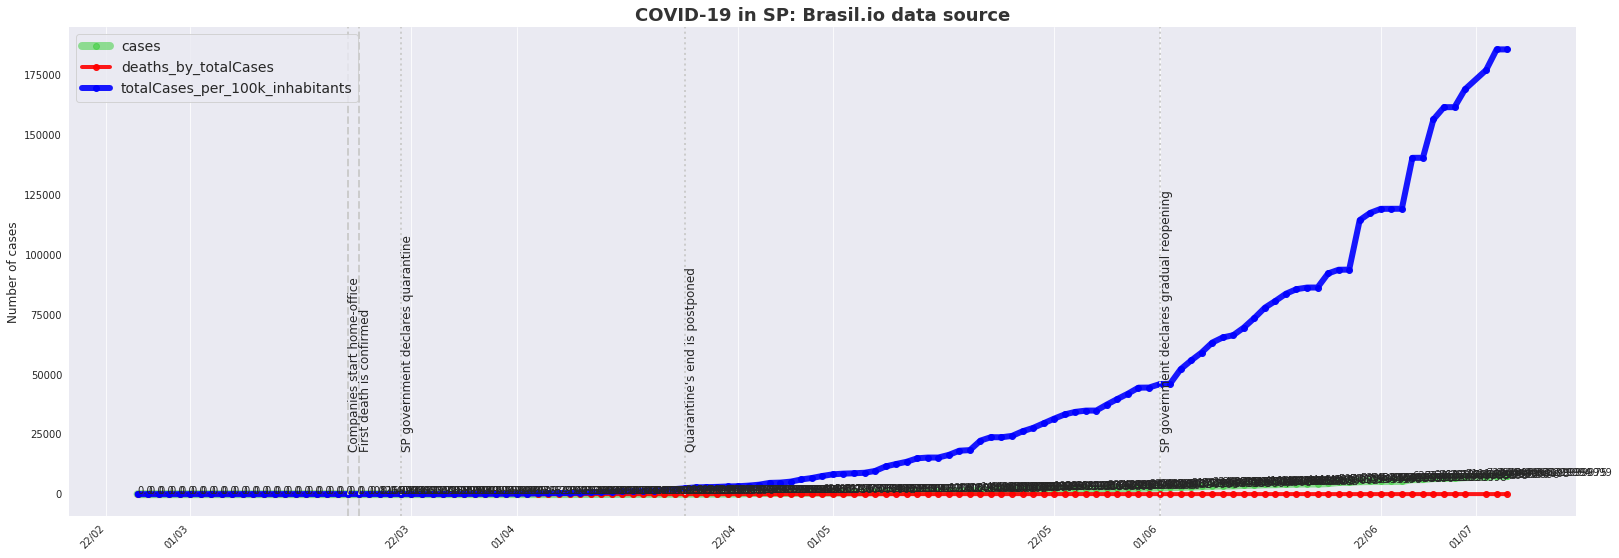

In [48]:
df = wcota
state='SP'
column_sort = 'date'
column_filter = 'state'
selected_column1 = 'deaths_per_100k_inhabitants'
selected_column2 = 'deaths_by_totalCases'
selected_column3 = 'totalCases_per_100k_inhabitants'
title = 'COVID-19 in SP: Brasil.io data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering SP value
df = df.loc[df.state == 'SP']

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            #df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)

            # Plotting messages

            plt.axvline('2020-03-16', 0, 1200, c='#CCCCCC', linestyle='--', linewidth=2, alpha=1)
            ax.annotate('Companies start home-office', xy=('2020-03-16',19000), fontsize=12, rotation=90)

            plt.axvline('2020-03-17', 0, 1200, c='#CCCCCC', linestyle='--', linewidth=2, alpha=1)
            ax.annotate('First death is confirmed', xy=('2020-03-17',19000), fontsize=12, rotation=90)

            plt.axvline('2020-03-21', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
            ax.annotate('SP government declares quarantine', xy=('2020-03-21',19000), fontsize=12, rotation=90)

            plt.axvline('2020-04-17', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
            ax.annotate("Quarantine's end is postponed", xy=('2020-04-17',19000), fontsize=12, rotation=90)

            plt.axvline('2020-06-01', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
            ax.annotate('SP government declares gradual reopening', xy=('2020-06-01',19000), fontsize=12, rotation=90)

            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

### Plotting only MG state data

In [49]:
df = wcota

In [50]:
df_mg = df.loc[df.state == 'MG']
df_mg.shape

(33267, 18)

In [51]:
columns = ["deaths_per_100k_inhabitants","deaths_by_totalCases","totalCases_per_100k_inhabitants"]


In [52]:
df_mg = df_mg.sort_values('date')
df_mg = df_mg.dropna(subset=['state'])
cumulated_mg = df_mg.groupby('date').agg({'deaths_per_100k_inhabitants': 'sum', 
                                    'deaths_by_totalCases': 'sum', 
                                    'totalCases_per_100k_inhabitants': 'sum'}).reset_index()

In [53]:
cumulated_mg.head()

,date,deaths_per_100k_inhabitants,deaths_by_totalCases,totalCases_per_100k_inhabitants
0,2020-03-08,0.0,0.0,0.41976
1,2020-03-09,0.0,0.0,0.41976
2,2020-03-10,0.0,0.0,0.41976
3,2020-03-11,0.0,0.0,0.41976
4,2020-03-12,0.0,0.0,0.79940


In [54]:
cumulated_mg.describe()

,deaths_per_100k_inhabitants,deaths_by_totalCases,totalCases_per_100k_inhabitants
count,118.000000,118.000000,118.000000
mean,599.319144,14.413977,20435.215028
std,760.612774,10.382816,31935.199023
min,0.000000,0.000000,0.419760
25%,5.488185,2.437628,342.776470
50%,303.223025,19.225420,3435.742210
75%,840.846603,23.175767,28522.543980
max,2991.968370,31.026110,132834.121860


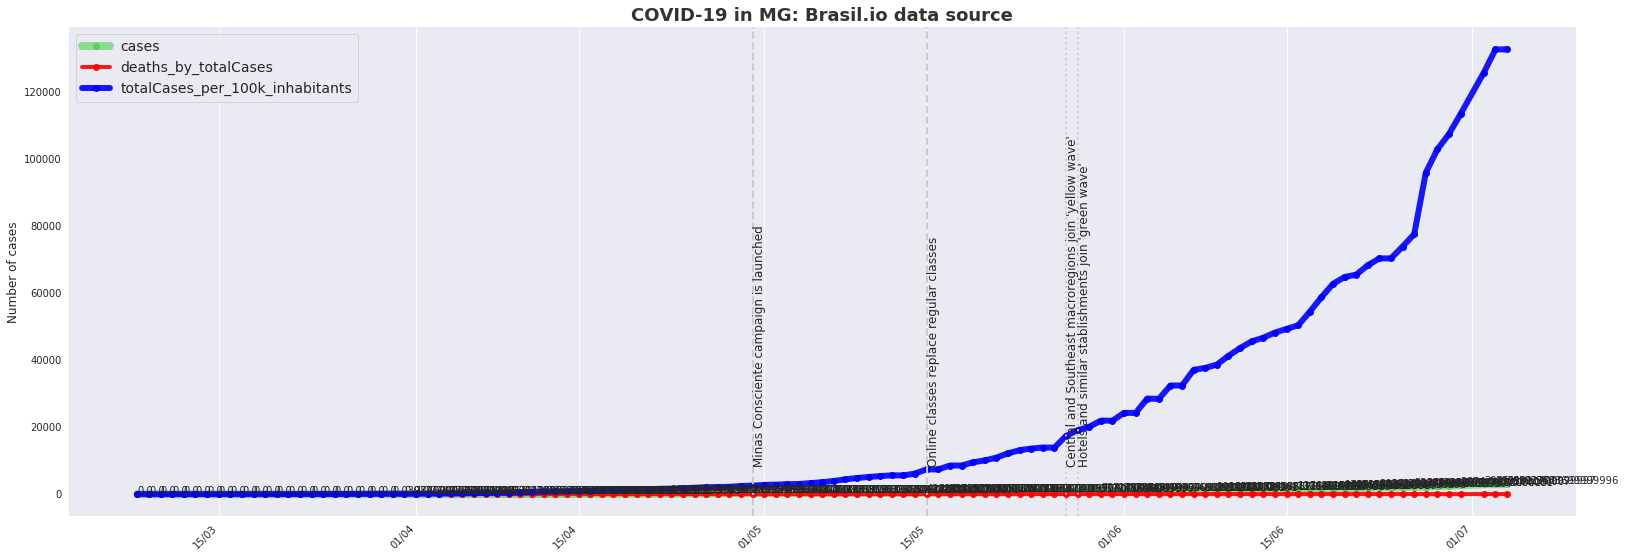

In [55]:
df = wcota
state='MG'
column_sort = 'date'
column_filter = 'state'
selected_column1 = 'deaths_per_100k_inhabitants'
selected_column2 = 'deaths_by_totalCases'
selected_column3 = 'totalCases_per_100k_inhabitants'
title = 'COVID-19 in MG: Brasil.io data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering MG value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            #df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)

            # Plotting messages

            plt.axvline('2020-04-30', 0, 1200, c='#CCCCCC', linestyle='--', linewidth=2, alpha=1)
            ax.annotate('Minas Consciente campaign is launched', xy=('2020-04-30',9000), fontsize=12, rotation=90)

            plt.axvline('2020-05-15', 0, 1200, c='#CCCCCC', linestyle='--', linewidth=2, alpha=1)
            ax.annotate('Online classes replace regular classes', xy=('2020-05-15',9000), fontsize=12, rotation=90)

            plt.axvline('2020-05-27', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
            ax.annotate("Central and Southeast macroregions join 'yellow wave'", xy=('2020-05-27',9000), fontsize=12, rotation=90)

            plt.axvline('2020-05-28', 0, 1200, c='#CCCCCC', linestyle='dotted', linewidth=2, alpha=1)
            ax.annotate("Hotels and similar stablishments join 'green wave'", xy=('2020-05-28',9000), fontsize=12, rotation=90)

            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

#### Comparing the cases in Sao Paulo state (SP) and in Minas Gerais state (MG), in SP, the number of cases increased faster than the number of confirmed cases per 100k inhabitants, while the opposite occurred in MG.

Hypothesis - MG possibly performed more testing than SP, so the number of confirmed cases grew fast

### Plotting only Amazonas state data

In [56]:
df = wcota

In [57]:
df_am = df.loc[df.state == 'AM']
df_am.shape

(4687, 18)

In [58]:
df_am.head()

,index,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,epi_week,cod_RegiaoDeSaude,name_RegiaoDeSaude,_source,location_id
105,122,2020-03-13,Brazil,AM,Manaus/AM,1302603,0,0,2,2,0.0,0.09163,0.0,NaN,NaN,None,None,7
137,155,2020-03-14,Brazil,AM,Manaus/AM,1302603,0,0,0,2,0.0,0.09163,0.0,NaN,NaN,None,None,7
172,191,2020-03-15,Brazil,AM,Manaus/AM,1302603,0,0,0,2,0.0,0.09163,0.0,NaN,NaN,None,None,7
210,230,2020-03-16,Brazil,AM,Manaus/AM,1302603,0,0,0,2,0.0,0.09163,0.0,NaN,NaN,None,None,7
260,281,2020-03-17,Brazil,AM,Manaus/AM,1302603,0,0,0,2,0.0,0.09163,0.0,NaN,NaN,None,None,7


In [59]:
df_am = df_am.sort_values('date')
df_am = df_am.dropna(subset=['state'])
cumulated_am = df_am.groupby('date').agg({'deaths': 'sum', 
                                    'totalCases': 'sum'}).reset_index()

In [60]:
df_am.head()

,index,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,epi_week,cod_RegiaoDeSaude,name_RegiaoDeSaude,_source,location_id
105,122,2020-03-13,Brazil,AM,Manaus/AM,1302603,0,0,2,2,0.0,0.09163,0.0,NaN,NaN,None,None,7
137,155,2020-03-14,Brazil,AM,Manaus/AM,1302603,0,0,0,2,0.0,0.09163,0.0,NaN,NaN,None,None,7
172,191,2020-03-15,Brazil,AM,Manaus/AM,1302603,0,0,0,2,0.0,0.09163,0.0,NaN,NaN,None,None,7
210,230,2020-03-16,Brazil,AM,Manaus/AM,1302603,0,0,0,2,0.0,0.09163,0.0,NaN,NaN,None,None,7
260,281,2020-03-17,Brazil,AM,Manaus/AM,1302603,0,0,0,2,0.0,0.09163,0.0,NaN,NaN,None,None,7


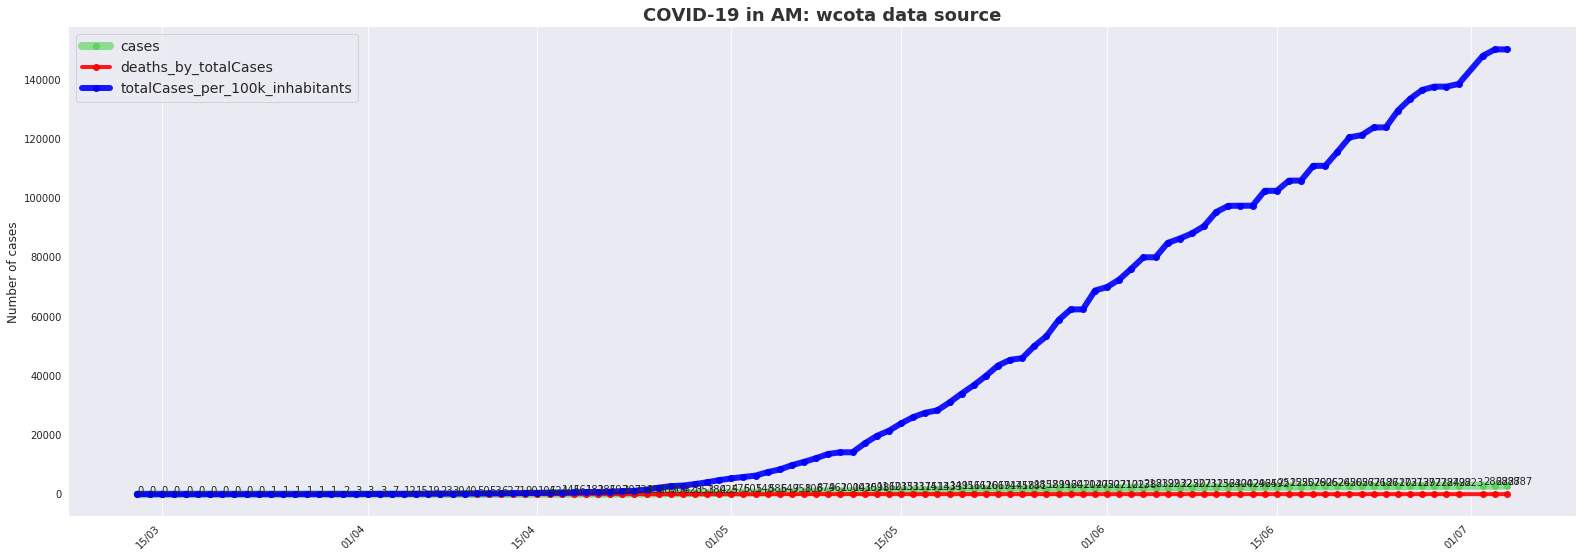

In [61]:
df = wcota
state='AM'
column_sort = 'date'
column_filter = 'state'
selected_column1 = 'deaths'
selected_column2 = 'deaths_by_totalCases'
selected_column3 = 'totalCases_per_100k_inhabitants'
title = 'COVID-19 in AM: wcota data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering AM value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            #df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)


            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

#### In the Amazonas state, the number of cases is rising, but not the number of deaths.

### Plotting only RS state data

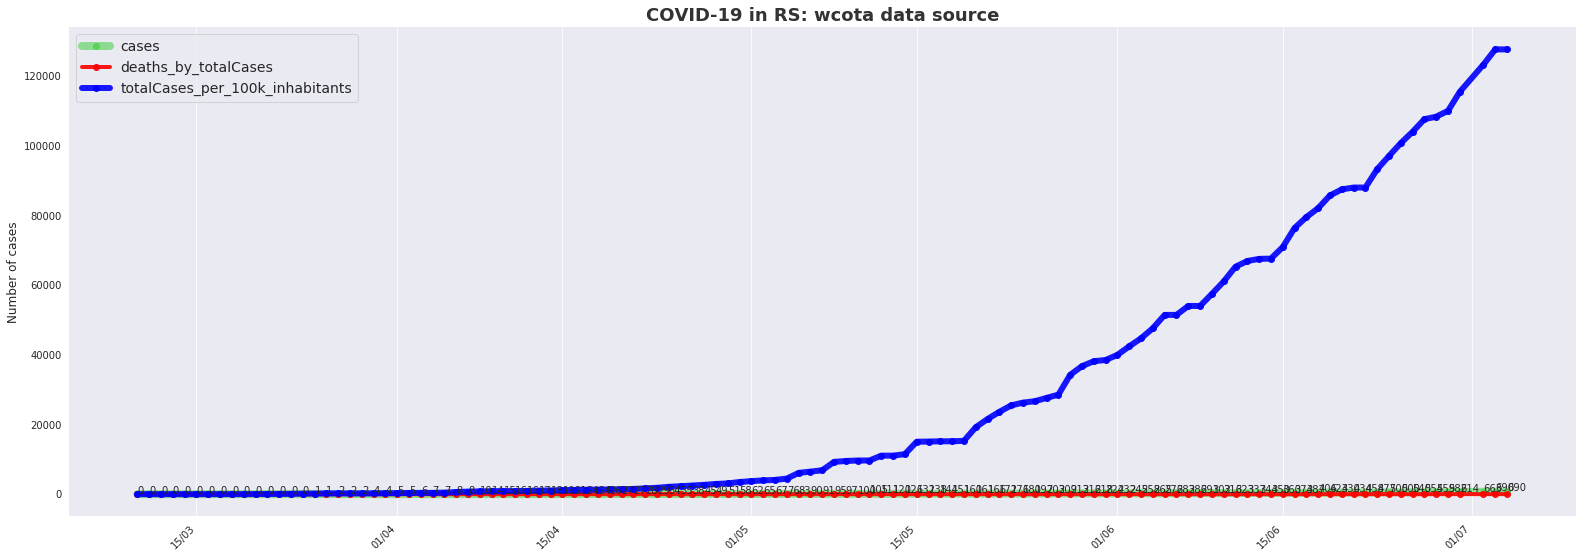

In [62]:
df = wcota
state='RS'
column_sort = 'date'
column_filter = 'state'
selected_column1 = 'deaths'
selected_column2 = 'deaths_by_totalCases'
selected_column3 = 'totalCases_per_100k_inhabitants'
title = 'COVID-19 in RS: wcota data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering AM value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            #df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)


            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

### Plotting only Espirito Santo state data

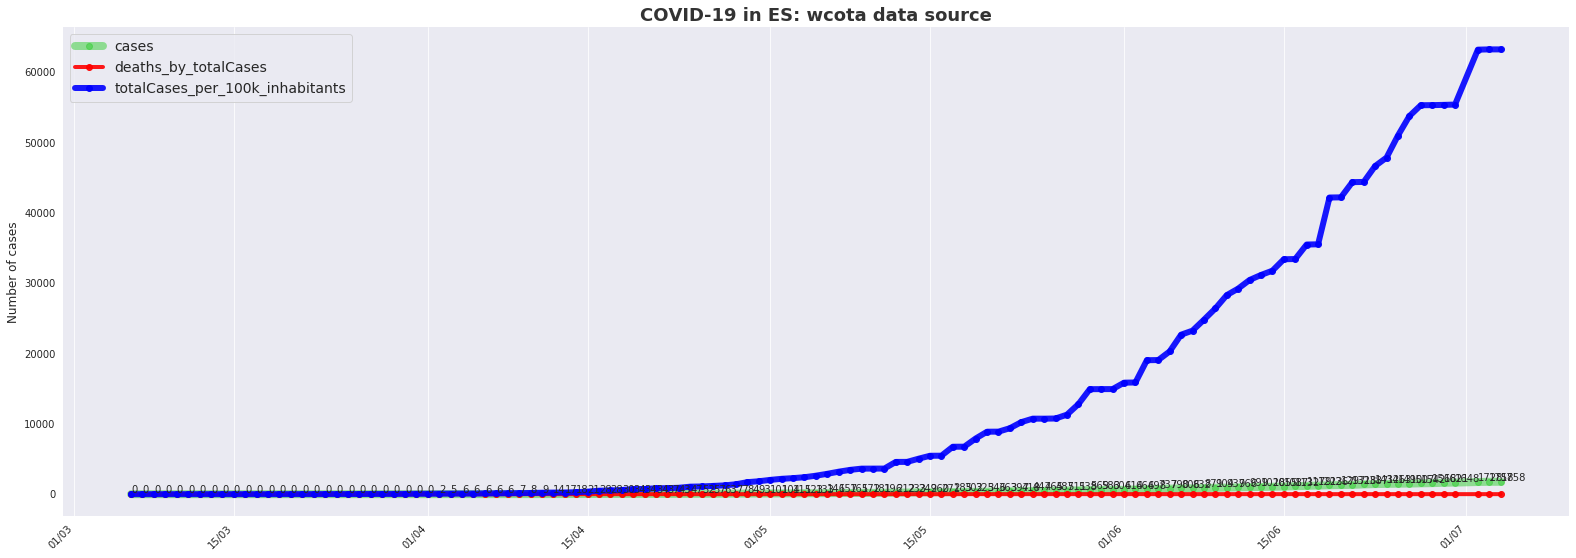

In [63]:
df = wcota
state='ES'
column_sort = 'date'
column_filter = 'state'
selected_column1 = 'deaths'
selected_column2 = 'deaths_by_totalCases'
selected_column3 = 'totalCases_per_100k_inhabitants'
title = 'COVID-19 in ES: wcota data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering AM value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            #df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)


            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

### In this case, the increase in the cases was followed closely by an increase of the number of deaths.

# In some states, though, there was a decrease at some point, which explains the peaks in the general graph

### Acre

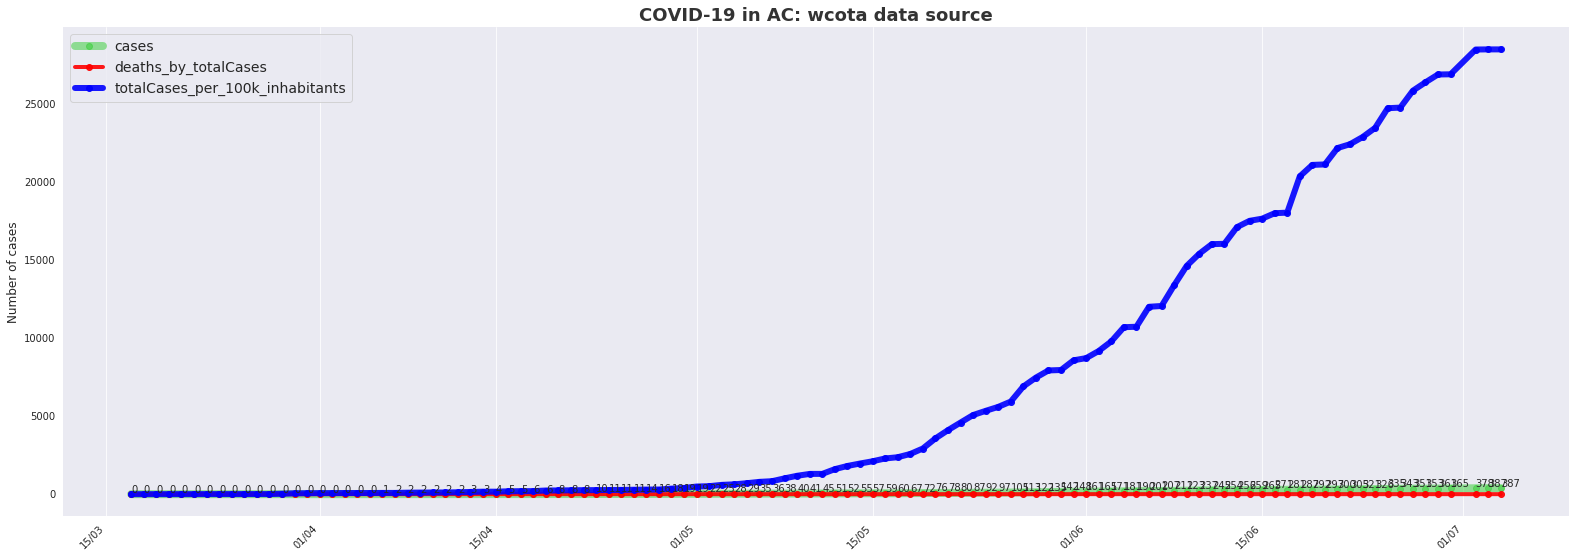

In [64]:
df = wcota
state='AC'
column_sort = 'date'
column_filter = 'state'
selected_column1 = 'deaths'
selected_column2 = 'deaths_by_totalCases'
selected_column3 = 'totalCases_per_100k_inhabitants'
title = 'COVID-19 in AC: wcota data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering AM value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            #df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)


            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

### Roraima

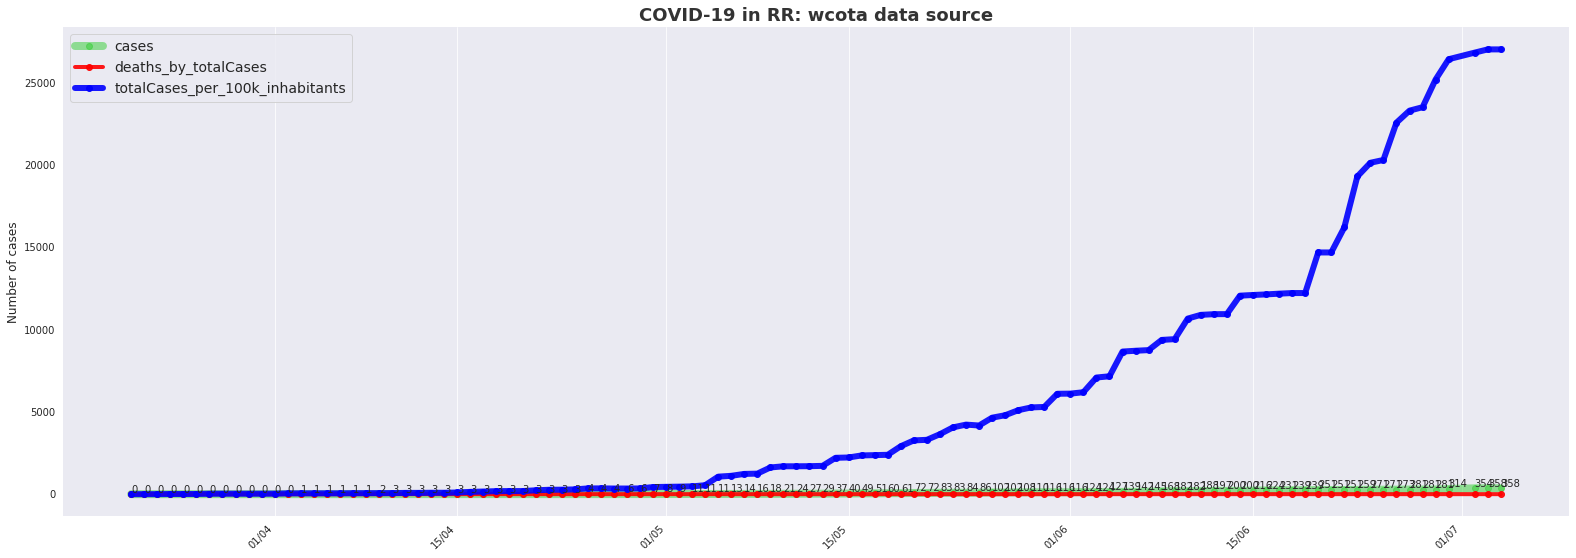

In [85]:
df = wcota
state='RR'
column_sort = 'date'
column_filter = 'state'
selected_column1 = 'deaths'
selected_column2 = 'deaths_by_totalCases'
selected_column3 = 'totalCases_per_100k_inhabitants'
title = 'COVID-19 in RR: wcota data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering AM value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            #df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)


            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

### Mato Grosso do Sul

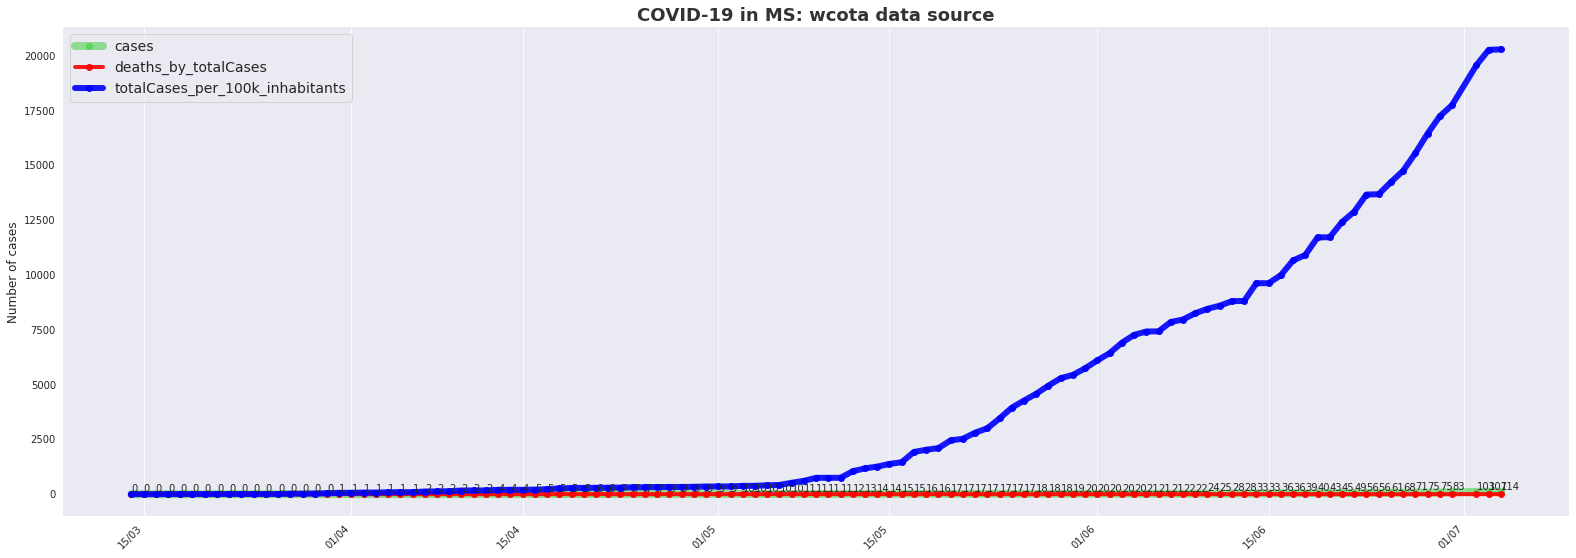

In [86]:
df = wcota
state='MS'
column_sort = 'date'
column_filter = 'state'
selected_column1 = 'deaths'
selected_column2 = 'deaths_by_totalCases'
selected_column3 = 'totalCases_per_100k_inhabitants'
title = 'COVID-19 in MS: wcota data source'
label_x = None
label_y = 'Number of cases'
label_legend = 'cases'


# Filtering AM value
df = df.loc[df.state == state]

df_shape = df.shape
    
if df_shape[0] == 0:
	print("dataframe with 0 rows")
else:
    if column_sort is not "":
        df = df.sort_values(column_sort)
        
    if column_filter is not "":
            df = df.dropna(subset=[column_filter])
            #df = df.loc[df.place_type == column_filter]     
            cumulated = df.groupby(column_sort).agg({selected_column1: 'sum', selected_column2: 'sum', selected_column3: 'sum'}).reset_index()

            #import matplotlib.pyplot as plt 
            #import matplotlib.dates as mdates
            #%matplotlib inline
            # Plotting

            fig, ax = plt.subplots(figsize=(27, 9))

            plt.plot(cumulated[column_sort], cumulated[selected_column1], color='limegreen', linewidth=8, alpha=0.5, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column2], color='red', linewidth=4, alpha=0.9, marker='o')
            plt.plot(cumulated[column_sort], cumulated[selected_column3], color='blue', linewidth=6, alpha=0.9, marker='o')

            [ax.annotate('%s' % y, xy=(x,y+100), fontsize=10) for x,y in zip(cumulated[column_sort], cumulated[selected_column1])]

            plt.xticks(rotation=45, ha='right')
            plt.title(title, fontsize=18, fontweight='bold', color='#333333')

            plt.ylabel(label_y, fontsize=12)
            plt.xlabel(label_x)


            # Legend and grid

            plt.legend(loc=2, labels=[label_legend,selected_column2, selected_column3], fontsize=14)

            plt.grid(which='major', axis='y')
            [ax.spines[side].set_visible(False) for side in ['left','right','top']]
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
            plt.show();

#### In all states the number of cases is increasing, but not necessarily the average number of deaths. This is a general trend detected.

### Conclusion

#### As a conclusion, the general behavior was an increase in the number of cases, although the number of average deaths per 100k inhabitants did not seem to increase as much. To explain why the states presented a similar behavior, further studies are necessary using, preferably, modelling or machine learning to describe the main features as soon as new information is released.

## *Developed by*

 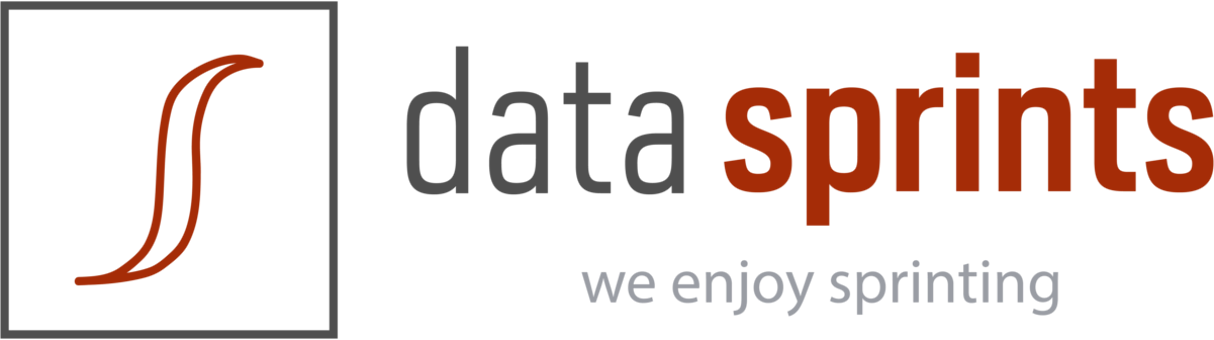